<a href="https://colab.research.google.com/github/Babiamba/Neuroniniai-tinklai/blob/main/2_darbas_Skai%C4%8Diai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Skaičių atpažinimas Neuroniniai Tinklai

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # Duomenų bazė Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Standartizacija įvesties duomenų
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

11501568/11490434 [==============================] - 0s 0us/step


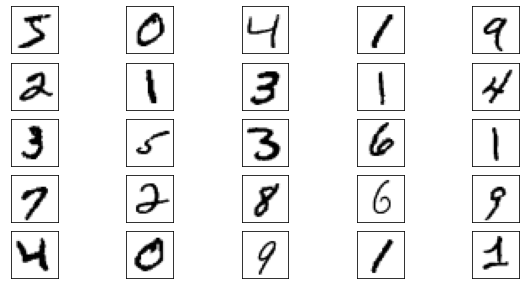

In [3]:
# Pirmų 25 pav. rodymas iš DB mokymui

plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [4]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'), # 128 neuronai vidiniame sluoksnyje
    Dense(10, activation='softmax') # 10 neuronų išvesties sluoksnyje
])

print(model.summary())      # NN sukurimas ir rodymas

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [5]:

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2) # NN mokymosis

model.evaluate(x_test, y_test_cat) # Rezultatai is atsitiktine,testines parinkties

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2854 - accuracy: 0.9186 - val_loss: 0.1666 - val_accuracy: 0.9517
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1270 - accuracy: 0.9634 - val_loss: 0.1299 - val_accuracy: 0.9625
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0855 - accuracy: 0.9740 - val_loss: 0.0960 - val_accuracy: 0.9712
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0641 - accuracy: 0.9806 - val_loss: 0.0938 - val_accuracy: 0.9716
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0881 - accuracy: 0.9737


[0.08810609579086304, 0.9736999869346619]

[[7.2695270e-06 1.2468540e-05 2.3730598e-05 6.2185606e-08 1.5915950e-05
  2.9204464e-06 9.9985814e-01 5.5544223e-07 7.8852157e-05 5.4127632e-08]]
 NT atpažino skaičių: 6


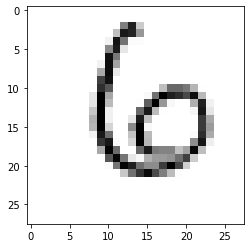

In [9]:
n = 100 # 100 skaiciaus is db atpazinimas
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print( f" NT atpažino skaičių: {np.argmax(res)}" )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

Testiniu rezultatu atpazinimas

In [10]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 8 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


Klaidingu rezultatu isvedimas

In [11]:
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = x_test[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True False  True]
(263, 28, 28)


25 klaidingu rezultatu isvedimas

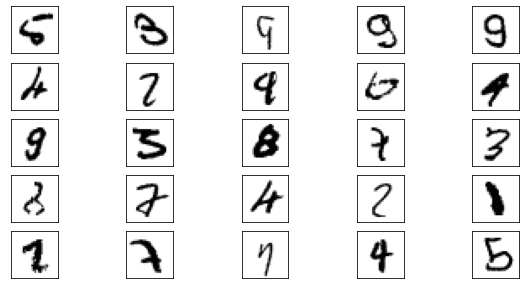

In [15]:
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()